In [1]:
import csv
import numpy as np
import math
from random import randrange

In [54]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

In [2]:
from pathlib import Path
import re

def read_dataset(file_path):
    file_path = Path(file_path)

    raw_text = file_path.read_text().strip()
    raw_docs = raw_text.split('\n')[4:]
#     ids_docs = []
#     keywords_docs = []
#     texts_docs = []
#     labels_docs = []
    ids = []
    keywords = []
    texts = []
    labels = []
    for line in raw_docs:
        
#         for line in doc.split('\n'):
        id_, keyword, text, label = line.split('\t')[0],line.split('\t')[2],line.split('\t')[4],line.split('\t')[5]
        ids.append(id_)
        keywords.append(keyword)
        texts.append(text)
        if(label=='0' or label=='1'):
            labels.append(0)
        else:
            labels.append(1)

    return ids, keywords, texts, labels

In [3]:
IDs,Keywords,Texts,Labels = read_dataset('dontpatronizeme_pcl.tsv')

In [48]:
pos_words = []
neg_words = []
for i in range(len(Labels)):
    print(Keywords[i])
    if(Labels[i]==1):
        if(Keywords[i] not in pos_words):
            pos_words.append(Keywords[i].lower())
    else:
        if(Keywords[i] not in neg_words):
            neg_words.append(Keywords[i].lower())

hopeless
migrant
immigrant
disabled
refugee
in-need
refugee
hopeless
homeless
in-need
migrant
vulnerable
women
poor-families
vulnerable
disabled
hopeless
migrant
disabled
immigrant
immigrant
vulnerable
homeless
vulnerable
refugee
women
migrant
hopeless
women
immigrant
homeless
refugee
disabled
disabled
migrant
homeless
homeless
hopeless
homeless
immigrant
disabled
hopeless
poor-families
vulnerable
refugee
in-need
in-need
vulnerable
immigrant
disabled
hopeless
disabled
women
disabled
disabled
homeless
migrant
homeless
in-need
homeless
poor-families
vulnerable
migrant
migrant
homeless
migrant
poor-families
vulnerable
refugee
migrant
women
migrant
refugee
homeless
vulnerable
vulnerable
homeless
women
vulnerable
poor-families
refugee
vulnerable
homeless
vulnerable
women
refugee
hopeless
in-need
poor-families
in-need
disabled
refugee
in-need
immigrant
immigrant
women
poor-families
immigrant
in-need
migrant
in-need
refugee
migrant
refugee
hopeless
women
homeless
vulnerable
immigrant
immigran

hopeless
vulnerable
migrant
migrant
homeless
disabled
immigrant
vulnerable
disabled
homeless
refugee
in-need
women
hopeless
poor-families
migrant
immigrant
women
homeless
disabled
hopeless
immigrant
refugee
migrant
refugee
hopeless
women
poor-families
migrant
migrant
refugee
immigrant
homeless
refugee
disabled
women
homeless
migrant
women
in-need
in-need
migrant
disabled
hopeless
hopeless
homeless
poor-families
migrant
homeless
in-need
vulnerable
migrant
migrant
immigrant
in-need
women
women
refugee
homeless
disabled
vulnerable
in-need
hopeless
homeless
hopeless
disabled
refugee
women
women
homeless
homeless
disabled
disabled
hopeless
hopeless
vulnerable
migrant
hopeless
immigrant
homeless
poor-families
in-need
vulnerable
poor-families
hopeless
homeless
in-need
immigrant
poor-families
refugee
immigrant
women
in-need
refugee
immigrant
homeless
women
in-need
in-need
immigrant
refugee
refugee
vulnerable
migrant
hopeless
migrant
disabled
vulnerable
in-need
in-need
immigrant
homeless
vulner

refugee
in-need
refugee
migrant
poor-families
vulnerable
immigrant
homeless
immigrant
immigrant
refugee
refugee
hopeless
disabled
migrant
in-need
hopeless
immigrant
immigrant
refugee
migrant
in-need
disabled
in-need
disabled
disabled
disabled
migrant
refugee
poor-families
vulnerable
poor-families
migrant
migrant
migrant
poor-families
vulnerable
hopeless
migrant
homeless
migrant
women
women
homeless
women
migrant
refugee
in-need
homeless
hopeless
homeless
poor-families
hopeless
hopeless
women
in-need
vulnerable
refugee
poor-families
refugee
migrant
women
women
migrant
immigrant
women
homeless
vulnerable
hopeless
disabled
immigrant
homeless
immigrant
immigrant
in-need
women
immigrant
vulnerable
immigrant
hopeless
homeless
homeless
refugee
vulnerable
disabled
hopeless
migrant
disabled
disabled
in-need
homeless
migrant
immigrant
vulnerable
vulnerable
migrant
immigrant
migrant
in-need
disabled
women
hopeless
vulnerable
homeless
refugee
vulnerable
migrant
homeless
women
hopeless
refugee
home

homeless
hopeless
vulnerable
migrant
hopeless
migrant
disabled
refugee
migrant
immigrant
homeless
refugee
in-need
women
vulnerable
disabled
homeless
poor-families
homeless
migrant
immigrant
disabled
disabled
refugee
homeless
vulnerable
vulnerable
in-need
refugee
disabled
refugee
vulnerable
homeless
in-need
homeless
women
in-need
migrant
women
refugee
in-need
poor-families
disabled
poor-families
immigrant
hopeless
hopeless
refugee
homeless
hopeless
vulnerable
poor-families
immigrant
homeless
migrant
hopeless
disabled
women
immigrant
disabled
refugee
refugee
homeless
migrant
refugee
hopeless
homeless
women
women
immigrant
immigrant
women
women
disabled
disabled
in-need
migrant
vulnerable
hopeless
in-need
in-need
immigrant
in-need
poor-families
poor-families
women
homeless
disabled
migrant
women
homeless
hopeless
immigrant
homeless
in-need
hopeless
poor-families
hopeless
refugee
in-need
disabled
women
poor-families
disabled
homeless
migrant
women
homeless
disabled
hopeless
immigrant
migra

refugee
refugee
vulnerable
disabled
homeless
refugee
vulnerable
refugee
vulnerable
women
disabled
hopeless
disabled
homeless
vulnerable
immigrant
disabled
migrant
immigrant
women
refugee
homeless
women
homeless
refugee
refugee
disabled
in-need
disabled
in-need
homeless
disabled
in-need
vulnerable
poor-families
refugee
refugee
disabled
migrant
disabled
migrant
immigrant
immigrant
immigrant
homeless
hopeless
homeless
hopeless
hopeless
homeless
disabled
refugee
women
women
women
homeless
disabled
women
homeless
refugee
homeless
in-need
homeless
immigrant
in-need
in-need
vulnerable
migrant
vulnerable
poor-families
in-need
in-need
hopeless
homeless
vulnerable
vulnerable
in-need
hopeless
hopeless
in-need
vulnerable
refugee
hopeless
vulnerable
immigrant
poor-families
homeless
poor-families
vulnerable
refugee
in-need
vulnerable
vulnerable
homeless
migrant
migrant
disabled
immigrant
women
migrant
women
disabled
migrant
migrant
homeless
in-need
homeless
disabled
immigrant
migrant
in-need
refugee

migrant
poor-families
poor-families
immigrant
hopeless
vulnerable
homeless
hopeless
disabled
poor-families
disabled
disabled
disabled
homeless
refugee
in-need
women
migrant
disabled
immigrant
migrant
migrant
refugee
in-need
migrant
vulnerable
women
immigrant
women
vulnerable
vulnerable
migrant
homeless
migrant
in-need
women
immigrant
hopeless
homeless
vulnerable
vulnerable
immigrant
vulnerable
vulnerable
women
refugee
in-need
women
hopeless
migrant
refugee
immigrant
refugee
homeless
refugee
women
hopeless
women
vulnerable
refugee
in-need
vulnerable
disabled
disabled
refugee
women
women
homeless
in-need
refugee
hopeless
in-need
immigrant
homeless
in-need
poor-families
vulnerable
immigrant
refugee
homeless
disabled
migrant
in-need
vulnerable
disabled
refugee
disabled
vulnerable
women
disabled
immigrant
disabled
refugee
vulnerable
in-need
homeless
poor-families
refugee
hopeless
homeless
in-need
poor-families
vulnerable
immigrant
women
vulnerable
vulnerable
immigrant
disabled
women
vulnera

poor-families
poor-families
vulnerable
women
women
women
poor-families
disabled
disabled
immigrant
hopeless
immigrant
immigrant
disabled
immigrant
homeless
refugee
immigrant
homeless
in-need
disabled
vulnerable
immigrant
disabled
women
homeless
hopeless
hopeless
vulnerable
hopeless
poor-families
hopeless
migrant
vulnerable
vulnerable
refugee
migrant
women
vulnerable
refugee
vulnerable
vulnerable
hopeless
immigrant
hopeless
immigrant
homeless
women
migrant
poor-families
immigrant
in-need
homeless
vulnerable
hopeless
women
migrant
immigrant
immigrant
hopeless
vulnerable
immigrant
in-need
women
migrant
disabled
immigrant
in-need
women
in-need
homeless
hopeless
hopeless
hopeless
women
migrant
vulnerable
refugee
vulnerable
in-need
disabled
refugee
poor-families
disabled
hopeless
migrant
hopeless
immigrant
immigrant
migrant
disabled
women
disabled
hopeless
poor-families
in-need
migrant
women
immigrant
refugee
refugee
homeless
vulnerable
hopeless
homeless
vulnerable
women
women
vulnerable
hop

In [61]:
set(Keywords)
custom_Keywords = ['dis','able',
 'home','less',
 'hope',
 'need',
 'migr',
 'poor',
 'refuge',
 'vulner',
 'women',]

In [62]:
custom_Keywords


['dis',
 'able',
 'home',
 'less',
 'hope',
 'need',
 'migr',
 'poor',
 'refuge',
 'vulner',
 'women']

In [50]:
lemma = nltk.wordnet.WordNetLemmatizer()

In [49]:
pos_words

['disabled',
 'hopeless',
 'homeless',
 'in-need',
 'poor-families',
 'women',
 'vulnerable',
 'refugee',
 'immigrant',
 'migrant']

In [254]:
lemmatize_words = dict()
lemmatize_frequency = dict()
for word in custom_Keywords:
#     print(str(word))
    print(lemma.lemmatize(word))

dis
able
home
le
hope
need
migr
poor
refuge
vulner
woman


In [59]:
ps = PorterStemmer()
for i in neg_words:
    print(lemma.lemmatize(ps.stem(i)))

hopeless
migrant
immigr
disabl
refuge
in-ne
homeless
vulner
woman
poor-famili


In [63]:
def feature_extraction(sentence):
    words=[]
    feature=[]
    pro = ["I", "me", "mine", "my", "you", "your", "yours", "we", "us", "ours", "them"]
    for i in sentence.split(' '):
        words.append(i.lower().replace(".",'').replace(",",'').replace("?",''))
#     print(words)
    x1=0
    x2=0
    x4=0
    x5=0
    for j in words:
        for k in custom_Keywords:
            if k in j:
                x1+=1
        if j in pro:
            x2+=1
    x3=len(i)
    x4=1
    feature = [x1,x2,x3,x4]
    return feature

In [64]:
features = []
for i in range(len(Texts)):
    features.append(feature_extraction(Texts[i]))

In [67]:
(features)

[[2, 1, 1, 1],
 [2, 1, 3, 1],
 [2, 0, 2, 1],
 [3, 0, 1, 1],
 [2, 3, 2, 1],
 [2, 4, 1, 1],
 [2, 0, 1, 1],
 [2, 0, 3, 1],
 [2, 0, 1, 1],
 [1, 0, 1, 1],
 [2, 1, 1, 1],
 [4, 1, 1, 1],
 [1, 0, 2, 1],
 [3, 0, 1, 1],
 [5, 1, 1, 1],
 [2, 0, 6, 1],
 [3, 0, 1, 1],
 [1, 0, 2, 1],
 [2, 0, 1, 1],
 [2, 0, 2, 1],
 [1, 0, 1, 1],
 [2, 1, 1, 1],
 [2, 0, 2, 1],
 [2, 0, 3, 1],
 [2, 0, 1, 1],
 [1, 0, 1, 1],
 [2, 6, 3, 1],
 [2, 4, 1, 1],
 [2, 0, 1, 1],
 [1, 2, 2, 1],
 [2, 0, 1, 1],
 [4, 2, 3, 1],
 [2, 0, 1, 1],
 [2, 0, 9, 1],
 [1, 0, 2, 1],
 [2, 0, 1, 1],
 [2, 0, 1, 1],
 [2, 0, 1, 1],
 [3, 0, 1, 1],
 [1, 3, 1, 1],
 [3, 0, 1, 1],
 [2, 0, 1, 1],
 [2, 1, 2, 1],
 [3, 0, 1, 1],
 [1, 0, 1, 1],
 [3, 2, 1, 1],
 [1, 0, 4, 1],
 [2, 0, 1, 1],
 [2, 1, 1, 1],
 [6, 0, 1, 1],
 [6, 8, 1, 1],
 [5, 0, 2, 1],
 [3, 0, 1, 1],
 [2, 0, 1, 1],
 [3, 0, 13, 1],
 [8, 0, 12, 1],
 [1, 0, 1, 1],
 [2, 0, 1, 1],
 [2, 1, 1, 1],
 [4, 1, 1, 1],
 [3, 0, 1, 1],
 [2, 0, 1, 1],
 [2, 0, 1, 1],
 [1, 0, 1, 1],
 [3, 0, 1, 1],
 [2, 0, 1, 1],
 [1, 0, 

In [68]:
x1,x2,x3,x4,x5,x6=[],[],[],[],[],[]
for i in features:
    x1.append(i[0])
    x2.append(i[1])
    x3.append(i[2])
    x4.append(i[3])
#     x7.append(i[6])

In [69]:
feature_extraction(Texts[0])

[2, 1, 1, 1]

In [72]:
len(features),len(Labels),len(IDs)

(10469, 10469, 10469)

In [74]:
rows = zip(IDs,x1,x2,x3,x4,Labels)

In [75]:
with open('GangarekalveSomashekar-Sanjay-Project.csv', 'w', newline='') as f:
    writer = csv.writer(f)
    writer.writerow(["ID","X1","X2","X3","X4","CLASS LABEL"])
    for row in rows:
        writer.writerow(row)

In [77]:
k={}
with open('GangarekalveSomashekar-Sanjay-Project.csv') as csvfile:
    reader = csv.DictReader(csvfile)
    for i in reader:
        id_=i['ID']
        x1=i['X1']
        x2=i['X2']
        x3=i['X3']
        x4=i['X4']
        label=i['CLASS LABEL']
        for j in i:
            if j in k.keys():
                k[j].append((i[j]))
            else:
                k[j]=[]
                k[j].append((i[j]))

In [78]:
kk = np.array((list(k.values())[1:-1]),dtype=float)
X_tt = kk.T
X_train = X_tt.tolist()
(X_train)
for i in range(len(X_train)):
    X_train[i].append(1)

In [226]:
X_train

[[2.0, 1.0, 1.0, 1.0, 1],
 [2.0, 1.0, 3.0, 1.0, 1],
 [2.0, 0.0, 2.0, 1.0, 1],
 [3.0, 0.0, 1.0, 1.0, 1],
 [2.0, 3.0, 2.0, 1.0, 1],
 [2.0, 4.0, 1.0, 1.0, 1],
 [2.0, 0.0, 1.0, 1.0, 1],
 [2.0, 0.0, 3.0, 1.0, 1],
 [2.0, 0.0, 1.0, 1.0, 1],
 [1.0, 0.0, 1.0, 1.0, 1],
 [2.0, 1.0, 1.0, 1.0, 1],
 [4.0, 1.0, 1.0, 1.0, 1],
 [1.0, 0.0, 2.0, 1.0, 1],
 [3.0, 0.0, 1.0, 1.0, 1],
 [5.0, 1.0, 1.0, 1.0, 1],
 [2.0, 0.0, 6.0, 1.0, 1],
 [3.0, 0.0, 1.0, 1.0, 1],
 [1.0, 0.0, 2.0, 1.0, 1],
 [2.0, 0.0, 1.0, 1.0, 1],
 [2.0, 0.0, 2.0, 1.0, 1],
 [1.0, 0.0, 1.0, 1.0, 1],
 [2.0, 1.0, 1.0, 1.0, 1],
 [2.0, 0.0, 2.0, 1.0, 1],
 [2.0, 0.0, 3.0, 1.0, 1],
 [2.0, 0.0, 1.0, 1.0, 1],
 [1.0, 0.0, 1.0, 1.0, 1],
 [2.0, 6.0, 3.0, 1.0, 1],
 [2.0, 4.0, 1.0, 1.0, 1],
 [2.0, 0.0, 1.0, 1.0, 1],
 [1.0, 2.0, 2.0, 1.0, 1],
 [2.0, 0.0, 1.0, 1.0, 1],
 [4.0, 2.0, 3.0, 1.0, 1],
 [2.0, 0.0, 1.0, 1.0, 1],
 [2.0, 0.0, 9.0, 1.0, 1],
 [1.0, 0.0, 2.0, 1.0, 1],
 [2.0, 0.0, 1.0, 1.0, 1],
 [2.0, 0.0, 1.0, 1.0, 1],
 [2.0, 0.0, 1.0, 1.0, 1],
 [3.0, 0.0, 

In [79]:
yy = np.array((list(k.values())[-1]),dtype=float)
Y_tt = yy.T
Y_train = Y_tt.tolist()
# (Y_train)

In [80]:
IDs = np.array((list(k.values())[0]))

In [81]:
def sigmoid(x):
    return 1/(1+math.exp(-x))

In [82]:
def loss(weight,feature,label):
    return -1*((label*np.log(sigmoid(np.dot(feature,weight))))+((1-label)*np.log(1-sigmoid(np.dot(feature,weight)))))

In [84]:
def SGD(no_epochs,weight,lr,x_train,y_train):
    epochs = 1
    while(epochs<=no_epochs):
        y_predict = []
        entropy_loss = []
#         print("Weight is ",weight)
        for i in range(len(x_train)):
            grad = []
            for j in range(len(x_train[i])):
                grad.append((sigmoid(np.dot(x_train[i],weight))-y_train[i])*x_train[i][j])
            entropy_loss.append(loss(weight,x_train[i],y_train[i]))
            for k in range(len(grad)):
                weight[k]-=round(grad[k]*lr,3)
            if(sigmoid(np.dot(x_train[i],weight))>=0.5):
                y_predict.append(1)
            else:
                y_predict.append(0)
        ct=0
        for i in range(len(y_predict)):
            if(y_predict[i]==y_train[i]):
                ct+=1
#         print("Accuracy is ",(ct/len(y_predict))*100,"%")
        
        epochs+=1
    return weight

In [85]:
def predict(x_test,weight):
    value = sigmoid(np.dot(x_test,weight))
    if(value>=0.5):
        return 1
    else:
        return 0

In [86]:
def accuracy(y_actual,y_predict):
    ct=0
    for i in range(len(y_actual)):
        if(y_actual[i]==y_predict[i]):
            ct+=1
    return (ct*100)/len(y_actual)

In [87]:
no_of_0 = 0
for i in Y_train:
    if(i==0):
        no_of_0+=1
# print(no_of_0)
no_of_1 = len(Y_train)-no_of_0
no_of_1

993

In [88]:
final_X_train = (X_train[:int((no_of_0)*0.8)]+X_train[no_of_0:no_of_0+int((no_of_1)*0.8)])

In [89]:
final_Y_train = (Y_train[:int((no_of_0)*0.8)]+Y_train[no_of_0:no_of_0+int((no_of_1)*0.8)])

In [90]:
X_test = X_train[int((no_of_0)*0.8):no_of_0]+X_train[no_of_0+int((no_of_1)*0.8):]

In [91]:
Y_test = Y_train[int((no_of_0)*0.8):no_of_0]+Y_train[no_of_0+int((no_of_1)*0.8):]

In [92]:
final_X_train = np.array(final_X_train,dtype=float)
final_Y_train = np.array(final_Y_train,dtype=float)
X_test = np.array(X_test,dtype=float)
Y_test = np.array(Y_test,dtype=float)

In [246]:
weight = [0,0,0,0,0]
lr = 0.1
no_epochs = 100

In [247]:
final_weights = SGD(no_epochs,weight,lr,final_X_train,final_Y_train)

In [248]:
len(X_train[:int(len(X_train)*0.8)]),len(X_train[int(len(X_train)*0.8):])

(8375, 2094)

In [249]:
y_predict = []
for i in X_test:
    y_predict.append(predict(i,final_weights))

In [250]:
accuracy(Y_test,y_predict)

83.86634844868735

In [251]:
sklearn.metrics.precision_recall_fscore_support(Y_test,y_predict,average=None)

(array([0.91719745, 0.13744076]),
 array([0.90471204, 0.15675676]),
 array([0.91091197, 0.14646465]),
 array([1910,  185]))

In [252]:
import sklearn
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(Y_test,y_predict, labels=[0,1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=['Not PCL','PCL'])

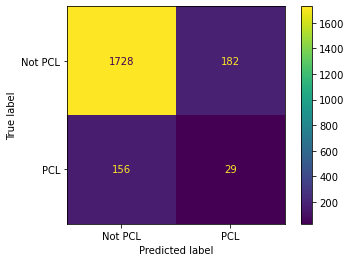

In [253]:
disp.plot()